In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve,auc

In [37]:
df = pd.read_csv('data.csv')
#Now let’s view our dataset using head():
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [38]:
# count the number of empty values in each columns:
df.isna().sum()

# drop the columns with all the missing values:
df = df.dropna(axis = 1)

df.shape

# Get the count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\pushp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

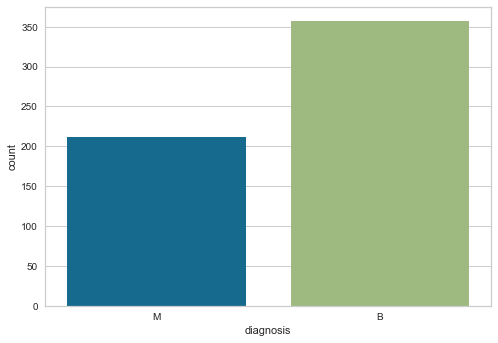

In [39]:
# visualize the count:
sns.countplot(df['diagnosis'], label = 'count')

In [42]:
## column labels is a diagnosis
df = df.rename(columns = {'diagnosis' : 'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Neural Network

<AxesSubplot:>

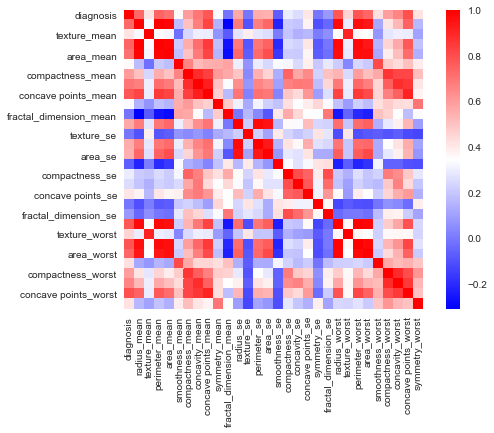

In [85]:
cor=df.corr()
sns.heatmap(cor,cmap='bwr',square=True)

In [43]:
# define the dependent variable that need to predict(label)
y = df['label'].values
print(np.unique(y))

['B' 'M']


In [44]:
# Encoding categorical data from text(B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M = 1 and B = 0
print(np.unique(Y))

[0 1]


In [54]:
# define x and normalize / scale value:
# define the independent variables, Drop label and ID, and normalize other data:
X  = df.drop(labels=['label','id'],axis = 1)
#scale / normalize the values to bring them into similar range:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [55]:
# Split data into training and testing data to verify accuracy after fitting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)
print('Shape of training data is: ', x_train.shape)
print('Shape of testing data is: ', x_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [56]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [57]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               3968      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trai

In [58]:
# fit with no early stopping or other callbacks:
history = model.fit(x_train,y_train,verbose = 1,epochs = 100, batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 0.6850 - accuracy: 0.5516 - val_loss: 0.6518 - val_accuracy: 0.8951
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6596 - val_loss: 0.6131 - val_accuracy: 0.9161
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6312 - accuracy: 0.6878 - val_loss: 0.5738 - val_accuracy: 0.9301
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5911 - accuracy: 0.7887 - val_loss: 0.5306 - val_accuracy: 0.9231
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5789 - accuracy: 0.7653 - val_loss: 0.4831 - val_accuracy: 0.9301
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.8099 - val_loss: 0.4353 - val_accuracy: 0.9301
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4860 - accuracy: 0.8333 - val_loss: 0.3858 - val_accuracy: 0.9231
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.0850 - accuracy: 0.9742 - val_loss: 0.0579 - val_accuracy: 0.9790
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0786 - accuracy: 0.9765 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 61/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0733 - accuracy: 0.9765 - val_loss: 0.0574 - val_accuracy: 0.9790
Epoch 62/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0943 - accuracy: 0.9718 - val_loss: 0.0527 - val_accuracy: 0.9790
Epoch 63/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9695 - val_loss: 0.0479 - val_accuracy: 0.9930
Epoch 64/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9718 - val_loss: 0.0515 - val_accuracy: 0.9790
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 0.9718 - val_loss: 0.0583 - val_accuracy: 0.9790
Epoch 66/100
7/7 [===============

Epoch 1/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0508 - val_accuracy: 0.9860
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0538 - accuracy: 0.9859 - val_loss: 0.0507 - val_accuracy: 0.9860
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0480 - accuracy: 0.9883 - val_loss: 0.0544 - val_accuracy: 0.9790
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9742 - val_loss: 0.0540 - val_accuracy: 0.9860
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0650 - val_accuracy: 0.9650
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0477 - accuracy: 0.9883 - val_loss: 0.0521 - val_accuracy: 0.9790
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0676 - val_accuracy: 0.9720
Epoch 60/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0298 - accuracy: 0.9930 - val_loss: 0.0567 - val_accuracy: 0.9790
Epoch 61/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0395 - accuracy: 0.9836 - val_loss: 0.0548 - val_accuracy: 0.9790
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9953 - val_loss: 0.0547 - val_accuracy: 0.9790
Epoch 63/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9812 - val_loss: 0.0603 - val_accuracy: 0.9790
Epoch 64/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9930 - val_loss: 0.0546 - val_accuracy: 0.9790
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0560 - val_accuracy: 0.9860
Epoch 66/100
7/7 [===============

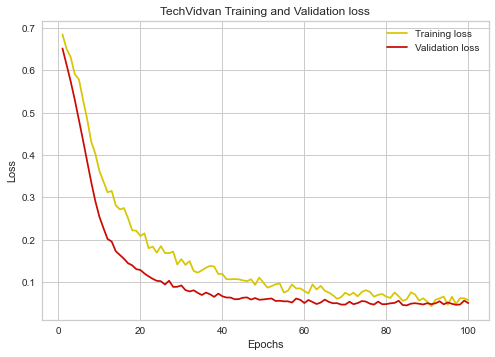

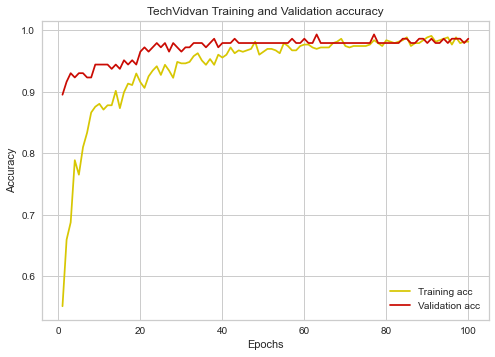

In [59]:
# plot the training and validation accuracy and loss at each epochs:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('TechVidvan Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('TechVidvan Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

LinearSVC()

GaussianNB()